<a href="https://colab.research.google.com/github/vishumestha/Python-Machine-Learning/blob/master/Boosting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
#Boosting sklearn library
import xgboost
import catboost
import lightgbm
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import AdaBoostRegressor

In [2]:
from google.colab import files
file=files.upload()

Saving train.csv to train.csv


In [3]:
ls

sample_data/  train.csv


In [4]:
from google.colab import files
file=files.upload()

Saving test.csv to test.csv


In [27]:
#Loading the training data
df_train=pd.read_csv("train.csv")
#Loading test_data
df_test=pd.read_csv("test.csv")
df_train['train_test']='train'
df_test['train_test']='test'

#Checking the shape of the train and test dataset
print("train.shape",df_train.shape)
print("test.shape",df_test.shape) 

#Check the columns of the train and test
print("train_columns",(df_train.columns))
print("test_columns",list(df_test.columns))

#Check the columns missing in either of the data set
diff_train=list(set(df_train.columns)-set(df_test.columns))
diff_test=list(set(df_test.columns)-set(df_train.columns))
print("diff_train",diff_train)
print("diff_test",diff_test)

#combining training and testing data
df_train_test=pd.concat([df_train,df_test])  
print("After combining training and testing data",df_train_test.train_test.value_counts())


train.shape (199523, 42)
test.shape (99762, 42)
train_columns Index(['age', 'class_of_worker', 'industry_code', 'occupation_code',
       'education', 'wage_per_hour', 'enrolled_in_edu_inst_lastwk',
       'marital_status', 'major_industry_code', 'major_occupation_code',
       'race', 'hispanic_origin', 'sex', 'member_of_labor_union',
       'reason_for_unemployment', 'full_parttime_employment_stat',
       'capital_gains', 'capital_losses', 'dividend_from_Stocks',
       'tax_filer_status', 'region_of_previous_residence',
       'state_of_previous_residence', 'd_household_family_stat',
       'd_household_summary', 'migration_msa', 'migration_reg',
       'migration_within_reg', 'live_1_year_ago', 'migration_sunbelt',
       'num_person_Worked_employer', 'family_members_under_18',
       'country_father', 'country_mother', 'country_self', 'citizenship',
       'business_or_self_employed', 'fill_questionnaire_veteran_admin',
       'veterans_benefits', 'weeks_worked_in_year', 'year', 

In [35]:
df_train_test.dtypes
df_train_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 299285 entries, 0 to 99761
Data columns (total 42 columns):
age                                 299285 non-null int64
class_of_worker                     299285 non-null object
industry_code                       299285 non-null int64
occupation_code                     299285 non-null int64
education                           299285 non-null object
wage_per_hour                       299285 non-null int64
enrolled_in_edu_inst_lastwk         299285 non-null object
marital_status                      299285 non-null object
major_industry_code                 299285 non-null object
major_occupation_code               299285 non-null object
race                                299285 non-null object
hispanic_origin                     298411 non-null object
sex                                 299285 non-null object
member_of_labor_union               299285 non-null object
reason_for_unemployment             299285 non-null object
full_part

In [31]:
df_train_test.describe()

,age,industry_code,occupation_code,wage_per_hour,capital_gains,capital_losses,dividend_from_Stocks,num_person_Worked_employer,business_or_self_employed,veterans_benefits,weeks_worked_in_year,year
count,299285.000000,299285.000000,299285.000000,299285.000000,299285.000000,299285.000000,299285.000000,299285.000000,299285.000000,299285.000000,299285.000000,299285.000000
mean,34.538998,15.345818,11.314743,55.105027,431.742176,36.849010,195.851259,1.956172,0.176461,1.516498,23.178375,94.499998
std,22.318468,18.053638,14.455980,273.340729,4670.768536,269.789771,1937.847082,2.364857,0.555240,0.850395,24.404016,0.500001
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,94.000000
25%,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,94.000000
50%,33.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2.000000,8.000000,94.000000
75%,50.000000,33.000000,26.000000,0.000000,0.000000,0.000000,0.000000,4.000000,0.000000,2.000000,52.000000,95.000000
max,90.000000,51.000000,46.000000,9999.000000,99999.000000,4608.000000,99999.000000,6.000000,2.000000,2.000000,52.000000,95.000000


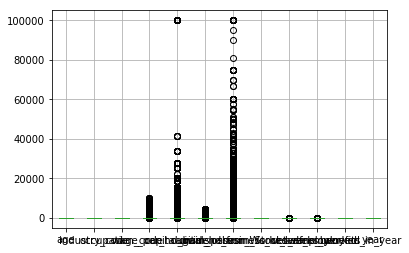

In [34]:
df_train_test.boxplot()